In [197]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #windows
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

### Info about data

In [76]:
# check the column
data.head() 

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [77]:
# check info about data
data.describe() 

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


<AxesSubplot:>

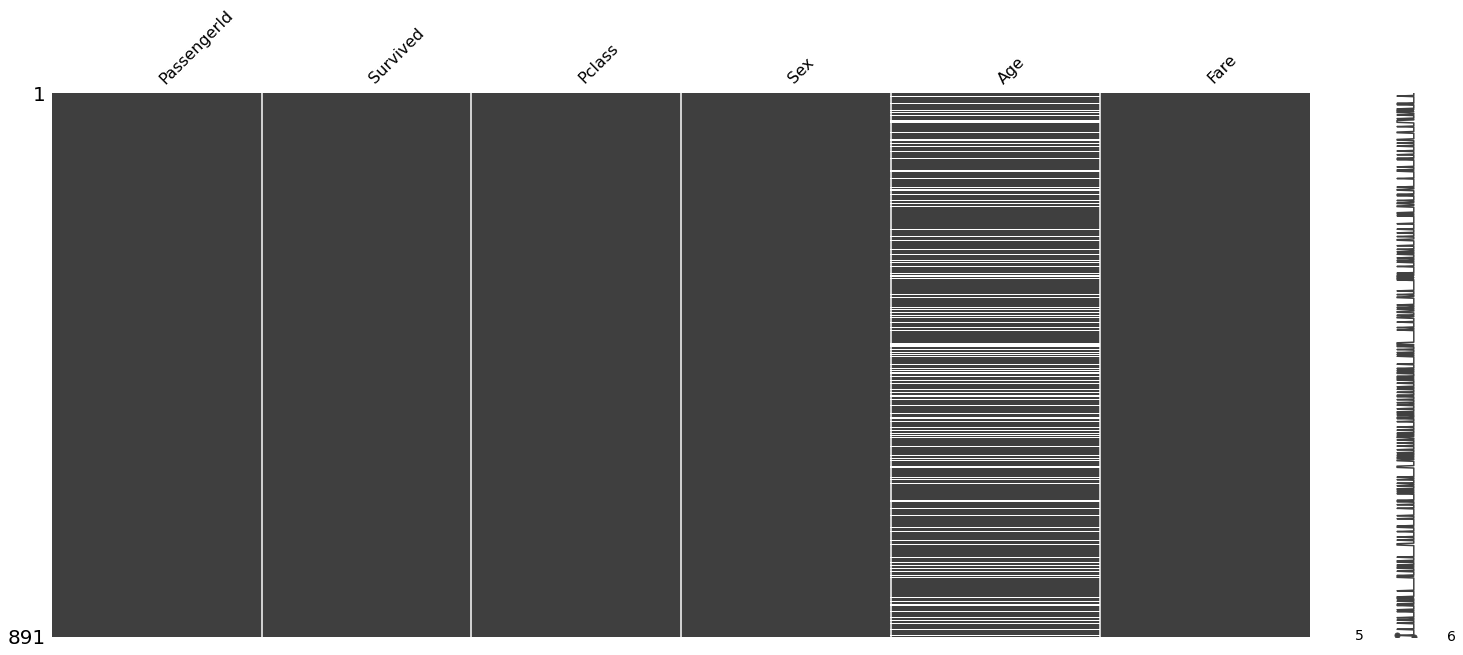

In [78]:
# chek missing value about data
import missingno as msno
msno.matrix(data)

In [79]:
# correlation map
data.corr()

,PassengerId,Survived,Pclass,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000


### various graphs

<AxesSubplot:>

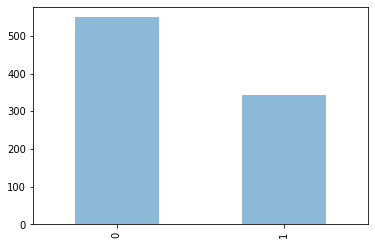

In [80]:
# Survived data
data.Survived.value_counts().plot(kind='bar', alpha=0.5)

<AxesSubplot:>

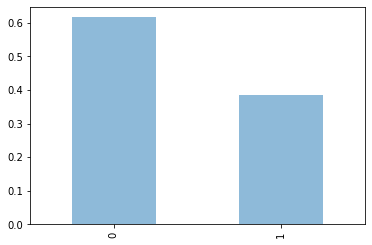

In [81]:
# Survived data by percent
data.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

Text(0.5, 1.0, 'Survived rate by Age')

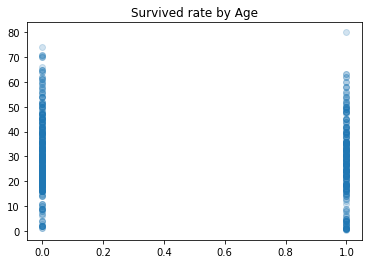

In [82]:
# age and survival rate
plt.scatter(data.Survived, data.Age, alpha=0.2)
plt.title('Survived rate by Age')

<AxesSubplot:>

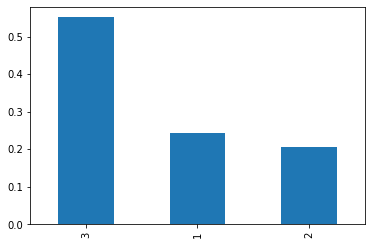

In [83]:
# Pclass rate
data.Pclass.value_counts(normalize=True).plot(kind='bar')

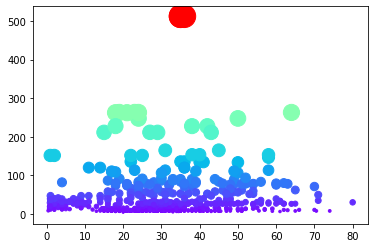

In [84]:
# scatter plot Fare by Age
plt.scatter(data.Age, data.Fare, c = data.Fare, s= data.Fare, cmap='rainbow')

In [85]:
data.loc[(data.Pclass==1) & (data.Sex=='male')]

,PassengerId,Survived,Pclass,Sex,Age,Fare
6,7,0,1,male,54.0,51.8625
23,24,1,1,male,28.0,35.5000
27,28,0,1,male,19.0,263.0000
30,31,0,1,male,40.0,27.7208
34,35,0,1,male,28.0,82.1708
...,...,...,...,...,...,...
839,840,1,1,male,NaN,29.7000
857,858,1,1,male,51.0,26.5500
867,868,0,1,male,31.0,50.4958
872,873,0,1,male,33.0,5.0000


Text(0.5, 0, 'Grade')

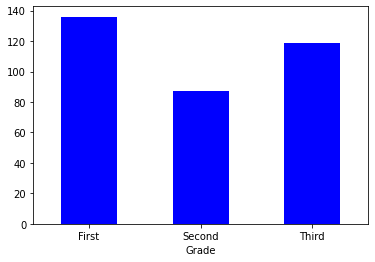

In [148]:
# bar plot Survived by Pclass
data.loc[(data.Survived==1)].groupby('Pclass')['Survived'].value_counts().plot(kind='bar', color='b')
index = [0, 1, 2]
plt.xticks(index, ['First', 'Second', 'Third'], rotation=0, color='black')
plt.xlabel('Grade')

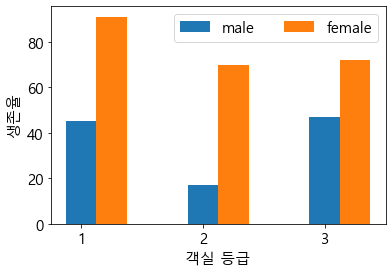

In [178]:
# bar plot Survived by Pclass, Sex
index = np.arange(3)
male_data = data.loc[(data.Survived==1) & (data.Sex=='male')].groupby('Pclass')['Survived'].value_counts()
plt.bar(index, male_data, width=.25, label='male')
female_data = data.loc[(data.Survived==1) & (data.Sex=='female')].groupby('Pclass')['Survived'].value_counts()
plt.bar(index+.25, female_data, width=.25, label='female')
plt.xticks(index, [1, 2, 3])
plt.legend(ncol=2)
plt.ylabel('생존율')
plt.xlabel('객실 등급')
plt.show()

c:\Users\hahav\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


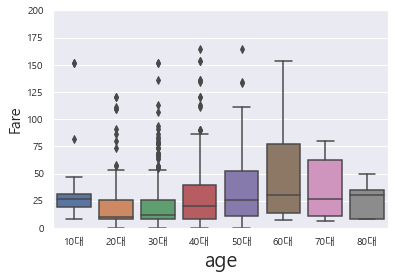

In [209]:
# boxplot Fare by Age_group
age_group = data['age_group'] = pd.cut(data.Age, bins=range(0, 81, 10))
sns.boxplot(age_group, data.Fare, data=data)
seq = np.arange(8)
age = [f'{i + 1}0대' for i in range(8)]
plt.xticks(seq, age,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('age', fontsize=20)
plt.ylabel('Fare', fontsize=15)
plt.ylim(0, 200)
plt.show()